In [1]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
import pandas as pd
import numpy as np 
import re
import spacy
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
from textblob import TextBlob
import seaborn as sns
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

In [3]:
data=pd.read_csv('Elon_musk.csv', encoding='Latin-1')
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
data.drop(labels='Unnamed: 0', inplace=True, axis=1)
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
def data_preprocessing(text):
    text=text.lower()
    text=re.sub(r"https\s+|www\s+https\s+"," ",text,flags=re.MULTILINE)
    text=re.sub("r\@w+|\@"," ",text)
    text=re.sub(r"[^\w\s]"," ",text)
    text_tokens=word_tokenize(text)
    filtered_text=[w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [6]:
data.text=data["Text"].apply(data_preprocessing)

In [7]:
data.text=data.drop_duplicates("Text")

In [10]:
stemmer=PorterStemmer()
def stemming(data):
    text=[stemmer.stem(word) for word in data]
    return data

In [11]:
data.text=data["Text"].apply(lambda x: stemming(x))

In [12]:
data.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [13]:
print(data["Text"].iloc[0],"\n")
print(data["Text"].iloc[1],"\n")
print(data["Text"].iloc[2],"\n")
print(data["Text"].iloc[3],"\n")
print(data["Text"].iloc[4],"\n")

@kunalb11 Im an alien 

@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? 

@joerogan @Spotify Great interview! 

@gtera27 Doge is underestimated 

@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! 



In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [15]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [16]:
data["polarity"]=data["Text"].apply(polarity)

In [17]:
data.head(10)

,Text,polarity
0,@kunalb11 Im an alien,-0.250000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0.000000
2,@joerogan @Spotify Great interview!,1.000000
3,@gtera27 Doge is underestimated,0.000000
4,@teslacn Congratulations Tesla China for amazi...,0.345313
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0.485227
6,"Frodo was the underdoge,\nAll thought he would...",0.000000
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),0.300000
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,0.000000
9,The most entertaining outcome is the most likely,0.375000


In [18]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label==0:
        return "Neutral"
    elif label >0:
        return "Positive"

In [19]:
data["sentiment"]=data["polarity"].apply(sentiment)

In [20]:
data.head()

,Text,polarity,sentiment
0,@kunalb11 Im an alien,-0.250000,Negative
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0.000000,Neutral
2,@joerogan @Spotify Great interview!,1.000000,Positive
3,@gtera27 Doge is underestimated,0.000000,Neutral
4,@teslacn Congratulations Tesla China for amazi...,0.345313,Positive


<AxesSubplot:xlabel='sentiment', ylabel='count'>

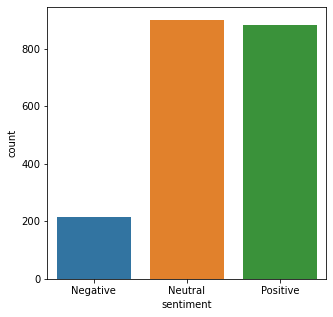

In [21]:
fig=plt.figure(figsize=(5,5))
sns.countplot(x="sentiment",data=data)

Text(0.5, 1.0, 'distribution of sentiments')

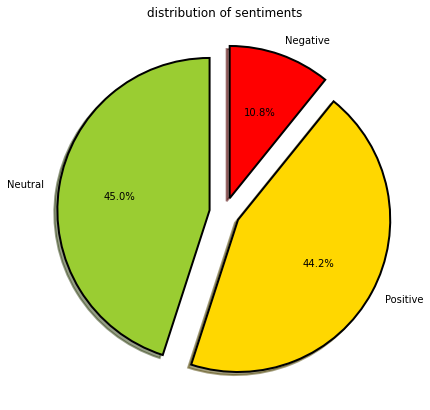

In [22]:
fig=plt.figure(figsize=(7,7))
colors=("yellowgreen","gold","red")
wp={"linewidth":2,"edgecolor":"black"}
tags=data["sentiment"].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind="pie",autopct="%1.1f%%",shadow=True,colors=colors,
         startangle=90,wedgeprops=wp,explode=explode,label=" " )
plt.title("distribution of sentiments")

In [42]:
pos_tweets=data[data.sentiment=="Positive"]
pos_tweets=pos_tweets.sort_values(["polarity"],ascending=False)
pos_tweets.head()

,Text,polarity,sentiment
2,@joerogan @Spotify Great interview!,1.0,Positive
1036,@Astro_FarmerBob @astro_Pettit @AstroKomrade @...,1.0,Positive
1718,@NASAPersevere @ulalaunch @NASA_LSP Congrats o...,1.0,Positive
1594,@Erdayastronaut Impressive,1.0,Positive
1575,Great mission patch design! https://t.co/p2Ic1...,1.0,Positive


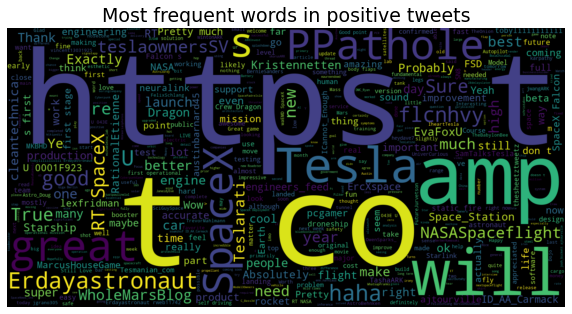

In [43]:
text=" ".join([word for word in pos_tweets["Text"]])
plt.figure(figsize=(10,7),facecolor="None")
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("Most frequent words in positive tweets",fontsize=19)
plt.show()

In [40]:
neg_tweets=data[data.sentiment=="Negative"]
neg_tweets=neg_tweets.sort_values(["polarity"],ascending=False)
neg_tweets.head()

,Text,polarity,sentiment
746,Would be great to hear from people who know a ...,-1.850372e-17,Negative
1739,"@Teslarati Should add a few miles of range, mo...",-1.850372e-17,Negative
1416,@flcnhvy Giant gap between experimental medica...,-4.166667e-03,Negative
613,"@TashaARK To be clear, this was just an XPeng ...",-1.250000e-02,Negative
1936,"@Erdayastronaut @flcnhvy @SpaceX Yeah, will ta...",-1.515152e-02,Negative


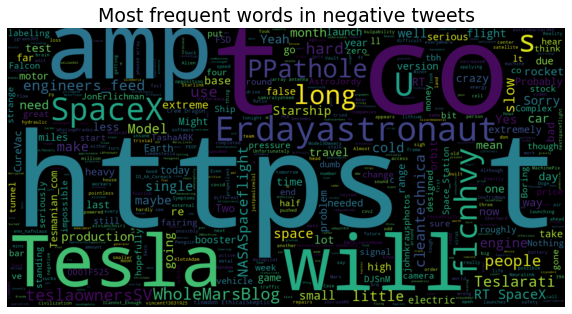

In [41]:
text=" ".join([word for word in neg_tweets["Text"]])
plt.figure(figsize=(10,7),facecolor="None")
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("Most frequent words in negative tweets",fontsize=19)
plt.show()

In [44]:
neutral_tweets=data[data.sentiment=="Neutral"]
neutral_tweets=neutral_tweets.sort_values(["polarity"],ascending=False)
neutral_tweets.head()

,Text,polarity,sentiment
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0.0,Neutral
1279,@JohnnaCrider1 @jhall They remind me of these ...,0.0,Neutral
1363,@SpceEnthusiast @tjmurphy_mit @thesheetztweetz...,0.0,Neutral
1364,@SpceEnthusiast @tjmurphy_mit @thesheetztweetz...,0.0,Neutral
1366,@tjmurphy_mit @thesheetztweetz @ExploreMars @S...,0.0,Neutral


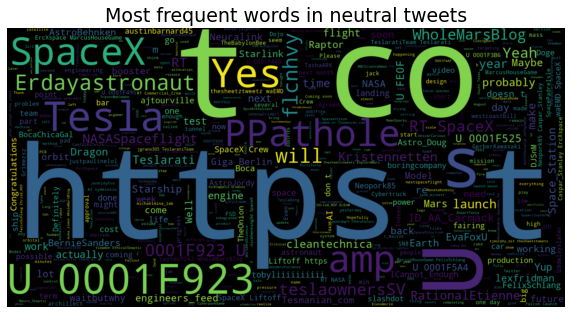

In [45]:
text=" ".join([word for word in neutral_tweets["Text"]])
plt.figure(figsize=(10,7),facecolor="None")
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("Most frequent words in neutral tweets",fontsize=19)
plt.show()

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(ngram_range=(1,2)).fit(data["Text"])

In [47]:
feature_names=vect.get_feature_names()
print("Number of features:",(len(feature_names)))
print("First 20 features :",(feature_names[:20]))

Number of features: 20777
First 20 features : ['000', '000 ft', '000 harder', '000 miles', '000 was', '0001f1e6', '0001f1e6 0001f600', '0001f1e6 trans', '0001f1e7', '0001f1e7 0001f1f4', '0001f1e8', '0001f1e8 0001f1e6', '0001f1e9', '0001f1e9 0001f1ea', '0001f1ea', '0001f1ea 0001f5a4', '0001f1ea natürlich', '0001f1ea vielen', '0001f1f4', '0001f1f8']


In [48]:
x=data["Text"]
y=data["sentiment"]
x=vect.transform(x)

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [50]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [51]:
from sklearn.metrics import accuracy_score, classification_report
y_test_pred=model.predict(x_test)
print(str(model),"accuracy :",accuracy_score(y_test,y_test_pred))
print(str(model),"classification_report :",classification_report(y_test,y_test_pred))

LogisticRegression() accuracy : 0.7725
LogisticRegression() classification_report :               precision    recall  f1-score   support

    Negative       0.44      0.11      0.17        38
     Neutral       0.75      0.91      0.82       182
    Positive       0.82      0.77      0.79       180

    accuracy                           0.77       400
   macro avg       0.67      0.60      0.60       400
weighted avg       0.75      0.77      0.75       400

